In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("Libraries imported successfully!")

Libraries imported successfully!


In [31]:
# Load the dataset
df = pd.read_csv('car data.csv')

# Display the first 5 rows to understand the structure
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [32]:
# 1. Clean up text (remove hidden spaces)
df['Fuel_Type'] = df['Fuel_Type'].str.strip()
df['Selling_type'] = df['Selling_type'].str.strip()
df['Transmission'] = df['Transmission'].str.strip()

# 2. Convert categorical text columns to numbers (Encoding)
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
df.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

print("Data cleaning complete. Text values converted to numbers.")
print(df.head()) # Show the change

Data cleaning complete. Text values converted to numbers.
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             0      0  
1             0             0      0  
2             0             0      0  
3             0             0      0  
4             0             0      0  


/tmp/ipython-input-6794392.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
/tmp/ipython-input-6794392.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
/tmp/ipython-input-6794392.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [27]:
# Separate Features (X) and Target (Y)
X = df.drop(['Car_Name','Selling_Price'], axis=1)
Y = df['Selling_Price']

# Split into Training (90%) and Testing (10%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Initialize and Train the Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

print("Model has been trained successfully.")

Model has been trained successfully.


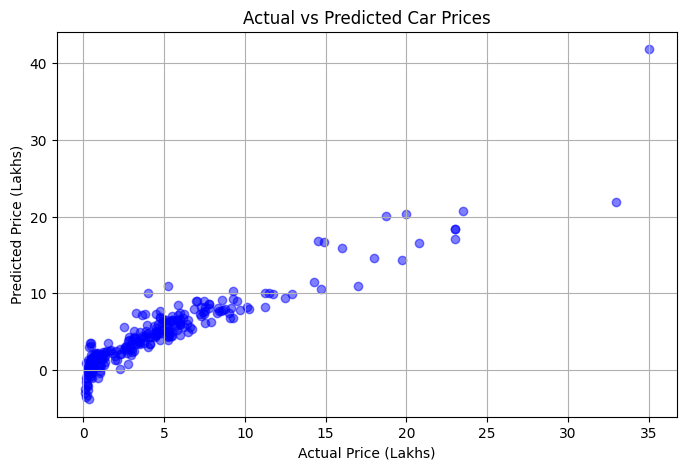

In [29]:
# Make predictions on the training data
predicted_prices = lin_reg_model.predict(X_train)

# Plot Actual vs Predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(Y_train, predicted_prices, color='blue', alpha=0.5)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

In [30]:
print("\n--- 🚗 LIVE PRICE PREDICTOR 🚗 ---")
print("Enter the car details below to test the model:\n")

# Interactive Inputs
try:
    p_year = int(input("1. Car Year (e.g., 2015): "))
    p_price = float(input("2. Present Showroom Price (in Lakhs, e.g., 5.5): "))
    p_kms = int(input("3. Kilometers Driven (e.g., 27000): "))

    p_fuel = input("4. Fuel Type (Petrol/Diesel/CNG): ").strip().capitalize()
    fuel_num = {'Petrol':0, 'Diesel':1, 'CNG':2}.get(p_fuel, 0)

    p_seller = input("5. Seller Type (Dealer/Individual): ").strip().capitalize()
    seller_num = {'Dealer':0, 'Individual':1}.get(p_seller, 0)

    p_trans = input("6. Transmission (Manual/Automatic): ").strip().capitalize()
    trans_num = {'Manual':0, 'Automatic':1}.get(p_trans, 0)

    p_owner = int(input("7. Number of Previous Owners (0/1/2): "))

    # Create input dataframe
    input_data = pd.DataFrame([[p_year, p_price, p_kms, fuel_num, seller_num, trans_num, p_owner]],
                              columns=['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

    # Predict
    prediction = lin_reg_model.predict(input_data)

    print("\n------------------------------------")
    print(f"💰 ESTIMATED PRICE: ₹ {prediction[0]:.2f} Lakhs")
    print("------------------------------------")

except ValueError:
    print("\n❌ Error: Please enter valid numbers.")


--- 🚗 LIVE PRICE PREDICTOR 🚗 ---
Enter the car details below to test the model:

1. Car Year (e.g., 2015): 2015
2. Present Showroom Price (in Lakhs, e.g., 5.5): 6
3. Kilometers Driven (e.g., 27000): 35000
4. Fuel Type (Petrol/Diesel/CNG): Petrol
5. Seller Type (Dealer/Individual): Dealer
6. Transmission (Manual/Automatic): Manual
7. Number of Previous Owners (0/1/2): 0

------------------------------------
💰 ESTIMATED PRICE: ₹ 4.37 Lakhs
------------------------------------
